<a href="https://colab.research.google.com/github/Parvinderkaur21/Analysis-of-Covid-Vaccination-on-world-data/blob/main/Classification_b_w_cats_and_dogs_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#importing libraries
import numpy as np
import pandas as pd
import cv2 #cnvrting images to arrays
import os
import matplotlib.pyplot as plt
import random
import pickle
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from keras import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense 
from sklearn.model_selection import train_test_split
import PIL

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-09-19 13:40:43--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.77.173.59, 2600:141b:e800:1483::317f, 2600:141b:e800:148c::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.77.173.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   235MB/s    in 3.5s    

2022-09-19 13:40:47 (224 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [3]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [4]:
#creating dataframe for input and output
input_path = []
label = []
for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name == 'Cat':
      label.append(0)
    if class_name == 'Dog':
      label.append(1)
    input_path.append(os.path.join("PetImages",class_name,path))
print(input_path[20],label[20])

PetImages/Dog/6974.jpg 1


In [5]:
#Creating dataframe
df = pd.DataFrame()
df['Images'] = input_path
df['Label'] = label
df = df.sample(frac = 1).reset_index(drop = True)  #for shuffling data
df.head()

Images  Label
0   PetImages/Dog/5090.jpg      1
1   PetImages/Cat/3063.jpg      0
2     PetImages/Cat/88.jpg      0
3  PetImages/Dog/10097.jpg      1
4   PetImages/Dog/7696.jpg      1

In [26]:
for i in df['Images']: #deleting db files
  if '.jpg' not in i:
    print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [27]:
df = df[df['Images']!= 'PetImages/Cat/Thumbs.db']
df = df[df['Images']!= 'PetImages/Dog/Thumbs.db']

In [28]:
len(df)

25000

In [31]:
l = []
for image in df['Images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Dog/11702.jpg', 'PetImages/Cat/666.jpg']

In [32]:
df = df[df['Images']!= 'PetImages/Dog/11702.jpg']
df = df[df['Images']!= 'PetImages/Cat/666.jpg']

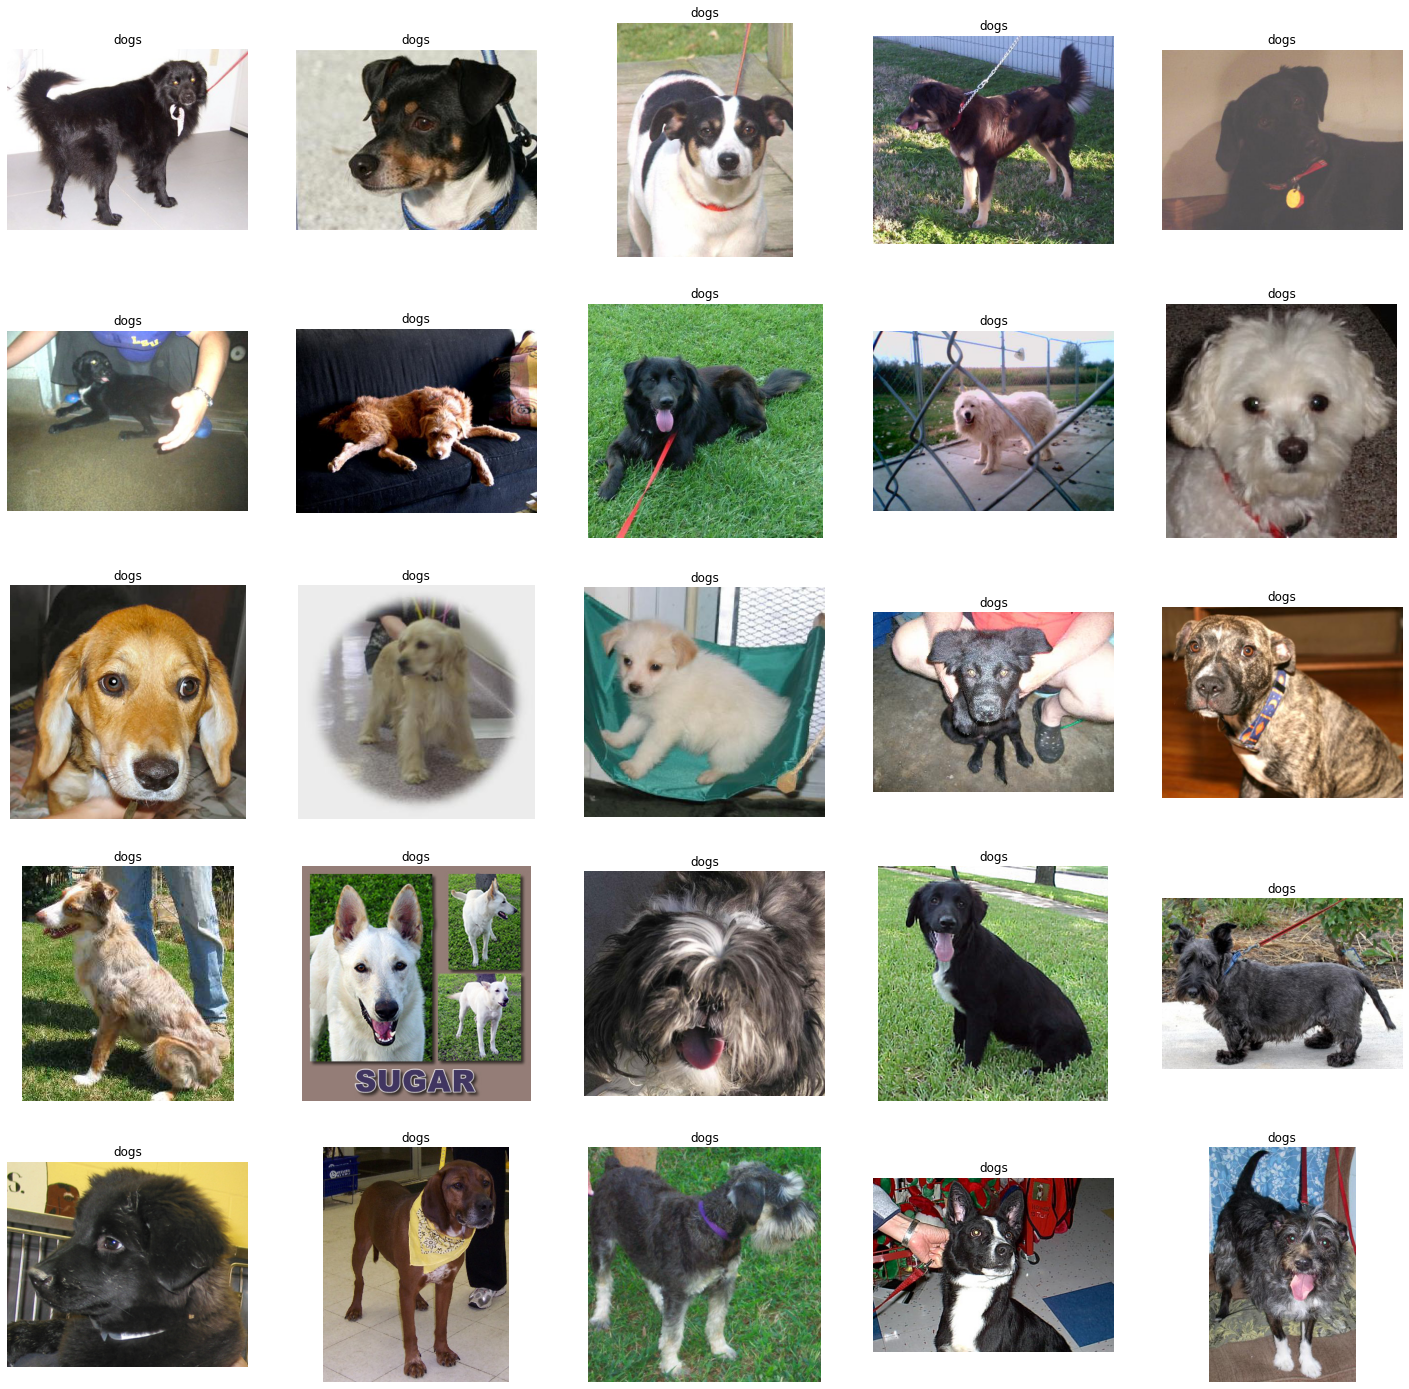

In [6]:
#Exploratory data analysis
#first displyng grid of images
plt.figure(figsize=(25,25))                     #FOR DOGS
temp = df[df['Label']==1]['Images']
start = random.randint(0,len(temp))
files = temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('dogs')
  plt.axis('off')

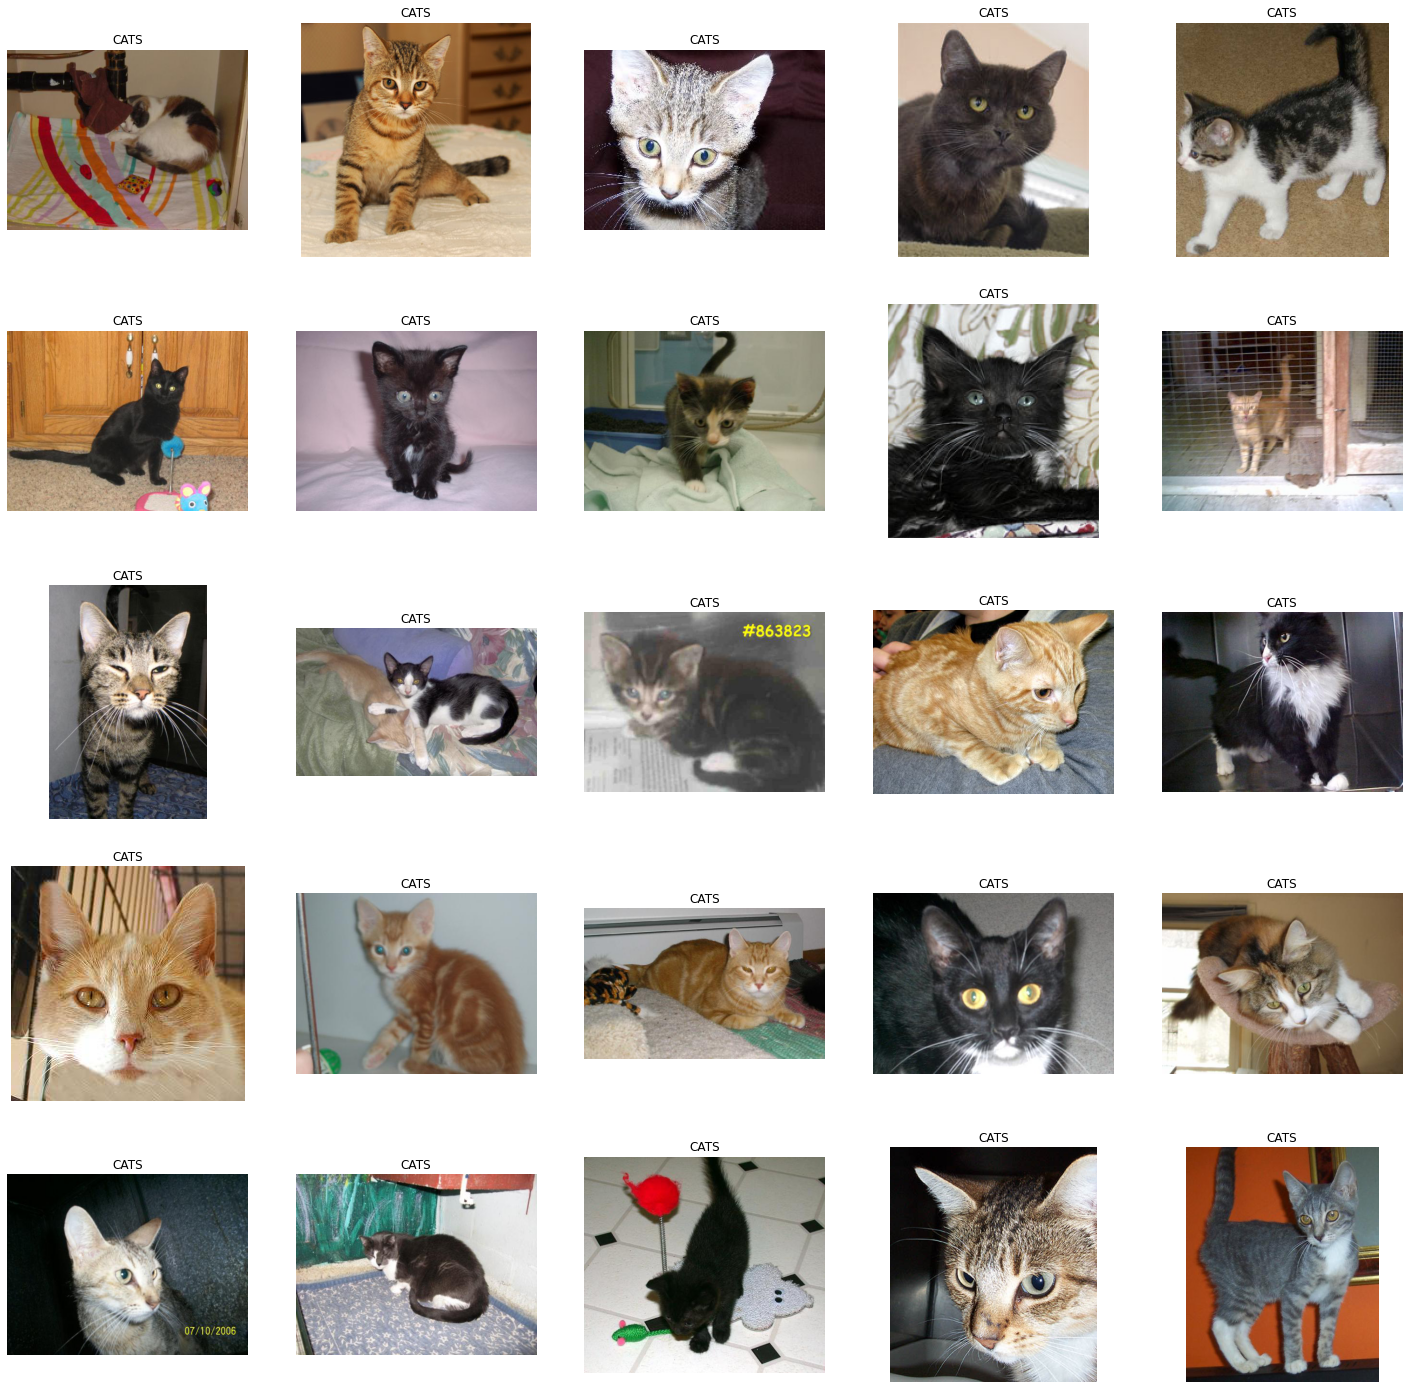

In [7]:
plt.figure(figsize=(25,25))                     #FOR CATS
temp = df[df['Label']==0]['Images']
start = random.randint(0,len(temp))
files = temp[start:start+25]
for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('CATS')
  plt.axis('off')

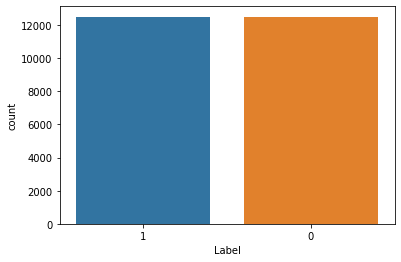

In [33]:
sns.countplot(df['Label'])

We can see clearly that the number of dogs and cats are almost same.

In [34]:
#NOW WE WILL CREATE DATAGENERATOR FOR IMAGES
#imageprocessng
train_generator = ImageDataGenerator(rescale = 1./255,rotation_range=45 , shear_range=0.2 ,
                  zoom_range = 0.4, horizontal_flip = True )

In [35]:
df['Label'] = df['Label'].astype('str')

In [36]:
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [37]:
train.head()

Images Label
23290   PetImages/Cat/3435.jpg     0
17784   PetImages/Dog/6010.jpg     1
1020   PetImages/Cat/10825.jpg     0
12646   PetImages/Cat/7032.jpg     0
1533    PetImages/Dog/2208.jpg     1

In [38]:
val_generator = ImageDataGenerator(rescale = 1./255)

In [39]:
train_iterator = train_generator.flow_from_dataframe(train, x_col='Images',y_col='Label',
                 target_size=(128,128), batch_size = 512, class_mode='binary')

Found 19998 validated image filenames belonging to 2 classes.


In [40]:
val_iterator = val_generator.flow_from_dataframe(test, x_col='Images',y_col='Label',
                 target_size=(128,128), batch_size = 512, class_mode='binary')

Found 5000 validated image filenames belonging to 2 classes.


In [41]:
df.size

49996

In [42]:
#MODEL BUILDING
model = Sequential([Conv2D(16,(3,3), activation = 'relu', input_shape = (128,128,3)),
        MaxPool2D((2,2)),
        Conv2D(32,(3,3), activation = 'relu'),  
        MaxPool2D((2,2)),   
        Conv2D(64,(3,3), activation = 'relu'), 
        MaxPool2D((2,2)),
        Flatten(),# converts into 1-D array
        Dense(512,activation ='relu'),
        Dense(1,activation='sigmoid'),
        

])

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)      

In [45]:
history = model.fit(train_iterator,epochs=10,validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 128s 3s/step - loss: 0.6217 - accuracy: 0.6497 - val_loss: 0.5571 - val_accuracy: 0.7210
Epoch 2/10
40/40 [==============================] - 137s 3s/step - loss: 0.5802 - accuracy: 0.6951 - val_loss: 0.5415 - val_accuracy: 0.7310
Epoch 3/10
40/40 [==============================] - 143s 4s/step - loss: 0.5604 - accuracy: 0.7091 - val_loss: 0.5479 - val_accuracy: 0.7220
Epoch 4/10
40/40 [==============================] - 163s 4s/step - loss: 0.5412 - accuracy: 0.7229 - val_loss: 0.5012 - val_accuracy: 0.7514
Epoch 5/10
40/40 [==============================] - 145s 4s/step - loss: 0.5250 - accuracy: 0.7339 - val_loss: 0.4915 - val_accuracy: 0.7682
Epoch 6/10
40/40 [==============================] - 138s 3s/step - loss: 0.5090 - accuracy: 0.7481 - val_loss: 0.4835 - val_accuracy: 0.7670
Epoch 7/10
40/40 [==============================] - 133s 3s/step - loss: 0.5151 - accuracy: 0.7388 - val_loss: 0.4837 - val_accuracy: 0.7724
Epoch 8/10
40

In [49]:
#Visualization of results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))


<Figure size 432x288 with 0 Axes>

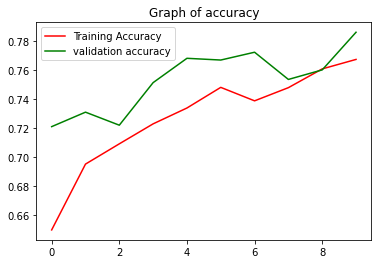

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(epochs,acc,'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc,'g',label = 'validation accuracy')
plt.title("Graph of accuracy")
plt.legend()
plt.figure()

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']


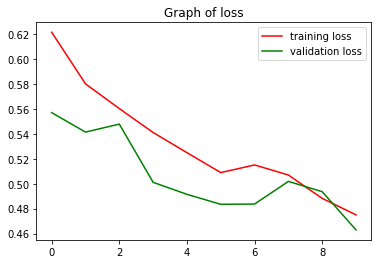

In [56]:
plt.plot(epochs,loss,'r',label = 'training loss')
plt.plot(epochs, val_loss,'g',label = 'validation loss')
plt.title("Graph of loss")
plt.legend()
plt.show()